In [43]:
# Importing the yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2020-01-01'
end_date = '2023-08-28'

# Set the ticker
ticker = 'GOOGL'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print the last 5 rows
print(data.tail())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-21  127.180000  128.729996  126.559998  128.369995  128.369995   
2023-08-22  128.509995  130.279999  128.320007  129.080002  129.080002   
2023-08-23  130.179993  133.410004  129.869995  132.369995  132.369995   
2023-08-24  133.949997  134.250000  129.570007  129.779999  129.779999   
2023-08-25  129.539993  130.759995  127.250000  129.880005  129.880005   

              Volume  
Date                  
2023-08-21  25248700  
2023-08-22  22067500  
2023-08-23  27819700  
2023-08-24  28500700  
2023-08-25  26744800  


In [2]:
df1=data.reset_index()['Close']

In [3]:
df1

0       68.433998
1       68.075996
2       69.890503
3       69.755501
4       70.251999
          ...    
914    128.369995
915    129.080002
916    132.369995
917    129.779999
918    129.880005
Name: Close, Length: 919, dtype: float64

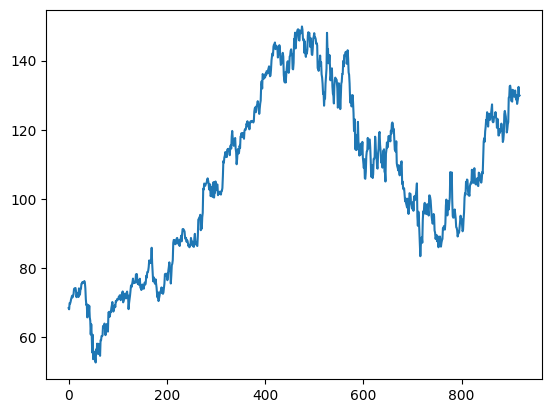

In [4]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [5]:
import numpy as np

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [7]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [8]:
training_size,test_size

(597, 322)

In [9]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [10]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [11]:
X_train

array([[0.1619188 , 0.15823308, 0.17691391, ..., 0.18151588, 0.18485671,
        0.18904167],
       [0.15823308, 0.17691391, 0.17552403, ..., 0.18485671, 0.18904167,
        0.18848061],
       [0.17691391, 0.17552403, 0.18063561, ..., 0.18904167, 0.18848061,
        0.18743052],
       ...,
       [0.96502176, 0.94447254, 0.91646939, ..., 0.65682782, 0.64901368,
        0.61570338],
       [0.94447254, 0.91646939, 0.91525443, ..., 0.64901368, 0.61570338,
        0.63509961],
       [0.91646939, 0.91525443, 0.93446035, ..., 0.61570338, 0.63509961,
        0.62694066]])

In [12]:
X_train.shape,y_train.shape

((496, 100), (496,))

In [13]:
X_test.shape,ytest.shape

((221, 100), (221,))

In [14]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
8/8 [==============================] - 8s 362ms/step - loss: 0.2090 - val_loss: 0.0637
Epoch 2/100
8/8 [==============================] - 2s 324ms/step - loss: 0.0340 - val_loss: 0.0119
Epoch 3/100
8/8 [==============================] - 2s 189ms/step - loss: 0.0234 - val_loss: 0.0074
Epoch 4/100
8/8 [==============================] - 1s 191ms/step - loss: 0.0103 - val_loss: 0.0107
Epoch 5/100
8/8 [==============================] - 1s 189ms/step - loss: 0.0064 - val_loss: 0.0046
Epoch 6/100
8/8 [==============================] - 2s 194ms/step - loss: 0.0042 - val_loss: 0.0061
Epoch 7/100
8/8 [==============================] - 1s 191ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 8/100
8/8 [==============================] - 2s 192ms/step - loss: 0.0031 - val_loss: 0.0039
Epoch 9/100
8/8 [==============================] - 3s 385ms/step - loss: 0.0027 - val_loss: 0.0036
Epoch 10/100
8/8 [==============================] - 2s 248ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 11/

In [19]:
import tensorflow as tf

In [20]:
tf.__version__

'2.12.0'

In [21]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

7/7 [==============================] - 0s 48ms/step


In [22]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

113.91244168301715

In [24]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

107.00985740547422

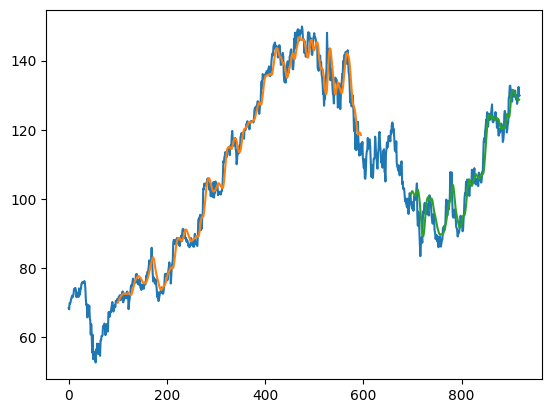

In [25]:
## Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
len(test_data)

322

In [30]:
x_input=test_data[222:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [33]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<=30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.78856623]
101
1 day input [0.53291912 0.5735854  0.55320081 0.54197893 0.5346693  0.56339311
 0.57821832 0.54836203 0.53322797 0.52993349 0.54136124 0.5425967
 0.54836203 0.52653603 0.5250947  0.56504031 0.56246649 0.56102516
 0.54167009 0.5425967  0.53518409 0.5442439  0.56689346 0.56256947
 0.60786866 0.65749185 0.66716943 0.65687416 0.68775997 0.70145261
 0.72194025 0.72121959 0.74479576 0.71916049 0.70207038 0.7286322
 0.74026582 0.73058824 0.72235208 0.73110304 0.74088351 0.75467921
 0.76806301 0.7185428  0.71483649 0.71576311 0.7302794  0.73223552
 0.73058824 0.7452075  0.72914691 0.72471994 0.69846706 0.72523474
 0.71689552 0.67571444 0.67561155 0.69465778 0.68353887 0.68971601
 0.69177512 0.71082135 0.69393711 0.68745112 0.65625639 0.66336015
 0.68178869 0.73954515 0.74860496 0.74067764 0.73151486 0.71370401
 0.68456838 0.6930105  0.70855637 0.71555716 0.78824181 0.78958009
 0.82231912 0.82376045 0.81171501 0.77907903 0.77979961 0.77629926
 0.81150906 0.81017062 0.79225696 0

In [34]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [35]:
import matplotlib.pyplot as plt

In [36]:
len(df1)

919

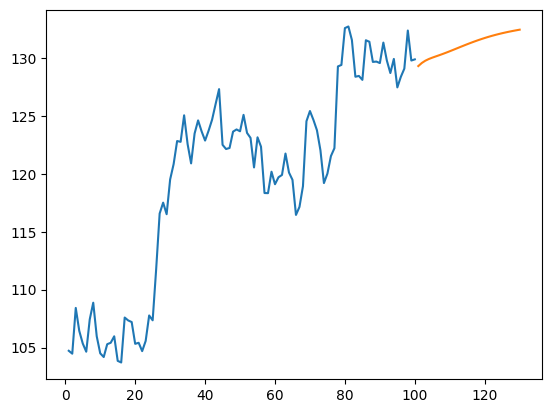

In [38]:
plt.plot(day_new,scaler.inverse_transform(df1[819:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

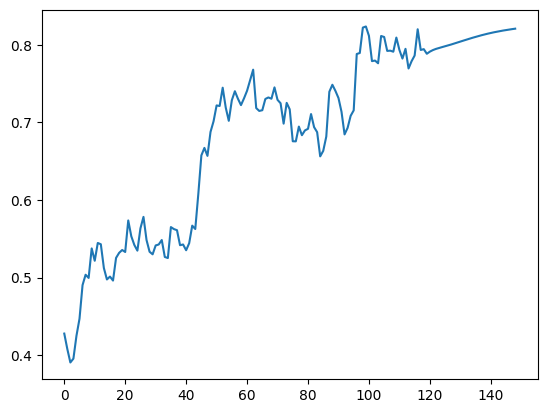

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[800:])

In [40]:
df3=scaler.inverse_transform(df3).tolist()

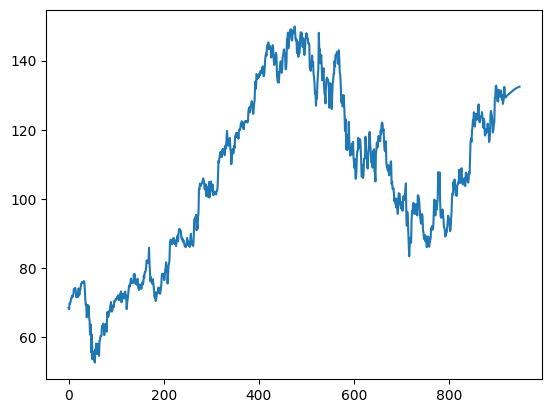

In [41]:
plt.plot(df3)